# Práctica 04.01: Regresión

### Importaciones

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#from keras import Sequential
#from keras.layers import Dense
#from keras.callbacks import History 

from tensorflow.keras.callbacks import History 
from tensorflow.keras.utils import Sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error


2025-04-03 10:14:46.343649: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 10:14:46.344371: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 10:14:46.346714: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 10:14:46.353829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743668086.364225   14058 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743668086.36

In [2]:
print(tf.config.list_physical_devices('GPU'))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[]
Num GPUs Available:  0


2025-04-03 10:14:50.574179: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Lectura de la información

#### Carga de los datos

Dataset: rossmann_curso.csv

In [3]:
df=pd.read_csv('rossmann_curso.csv')
print(df.shape)
print(df.head(5))

(1017209, 45)
   Customers  Open  Promo  Promo2  StateHoliday  SchoolHoliday  \
0        555     1      1       0             0              1   
1        546     1      1       0             0              1   
2        523     1      1       0             0              1   
3        560     1      1       0             0              1   
4        612     1      1       0             0              1   

   CompetitionDistance  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  ...  \
0               1270.0          0.0          0.0          0.0  ...   
1               1270.0          0.0          0.0          0.0  ...   
2               1270.0          0.0          0.0          1.0  ...   
3               1270.0          0.0          1.0          0.0  ...   
4               1270.0          1.0          0.0          0.0  ...   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0          1.0          0.0           1.0           0.0           0.0   
1          1.0        

In [16]:
# 1.- Cargar el dataset completo en un dataframe, usando read_csv

# 2.- Mostrar las dimensiones del dataset

# 3.- Mostrar las 5 primeras filas del dataset


### Preparación de los datos

In [4]:
sales=df['Sales']
df.drop(['Sales'], axis=1, inplace=True)
# 6.- Crear los conjuntos de entrenamiento y test con una relación 80/20
X_train, X_test, y_train, y_test = train_test_split(df, sales, test_size=0.2, random_state=42)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
# 8.- Mostrar las dimensiones de los tres nuevos conjuntos: entrenamiento, validación y test
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

# 9.- Calcular el promedio del objetivo del conjunto de entrenamiento
avg_conjunto_entrenamiento = y_train.mean()
print(avg_conjunto_entrenamiento)

# 10.- Calcular el error medio absoluto (MAE) sobre el conjunto de test
avg_conjunto_test = y_test.mean()
mae = mean_absolute_error(y_test, [avg_conjunto_test]*len(y_test))
print(mae)


(813767, 44)
(203442, 44)
(813767, 1)
(203442, 1)
(732390, 44)
(81377, 44)
(732390, 1)
(81377, 1)
(203442, 44)
(203442, 1)
(732390, 44)
(732390, 1)
(81377, 44)
(81377, 1)
5777.71205232185
2885.4067950497615


In [18]:
# 4.- Crear un nuevo dataframe con la columna objetivo (la última: 'Sales')

# 5.- Eliminar la columna objetivo del dataframe del dataset

# 6.- Crear los conjuntos de entrenamiento y test con una relación 80/20

# 7.- Dividir el conjunto de entrenamiento en entrenamiento y validación (relación 90/10)

# 8.- Mostrar las dimensiones de los tres nuevos conjuntos: entrenamiento, validación y test

# 9.- Calcular el promedio del objetivo del conjunto de entrenamiento

# 10.- Calcular el error medio absoluto (MAE) sobre el conjunto de test


### Costrucción del modelo: MLP profunda

In [5]:
modelo = Sequential() # crea modelo

modelo.add(Dense(350, activation='relu', input_shape=(X_train.shape[1],)))
modelo.add(Dense(350, activation='relu'))
modelo.add(Dense(350, activation='relu'))
modelo.add(Dense(350, activation='relu'))
modelo.add(Dense(350, activation='relu'))


modelo.add(Dense(1, activation='linear'))



/home/sergio/venv_dl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# 11.- Crear el modelo secuencial

# 12.- Añadir la capa de entrada: densa de 350 unidades y función de activación ReLU

# 13.- Añadir cuatro capas densas de 350 unidades con función de activación ReLU

# 14.- Añadir una capa densa de salida con activación lineal


### Compilación y entrenamiento

In [6]:
# 15. Compilar el modelo usado:
# - optimizador: adam
# - función de perdida: error médio cuadrático
# - métrica: promedio del error absoluto

modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
historial = modelo.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=20,batch_size=160)

Epoch 1/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 2741928.7500 - mae: 1032.4347 - val_loss: 1161439.7500 - val_mae: 708.2089
Epoch 2/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - loss: 1236540.3750 - mae: 746.4069 - val_loss: 1090151.5000 - val_mae: 703.3646
Epoch 3/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 1140686.5000 - mae: 713.7104 - val_loss: 1102130.6250 - val_mae: 698.4473
Epoch 4/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - loss: 1087636.5000 - mae: 699.0092 - val_loss: 1092507.5000 - val_mae: 717.2427
Epoch 5/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - loss: 1061212.6250 - mae: 689.5447 - val_loss: 985362.1875 - val_mae: 667.3535
Epoch 6/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 1023718.0625 - mae: 678.5051 - val_loss: 1010666.3125 - val_mae: 676.6628
Epoch 7/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 995300.5625 - mae: 671.6781 - val_loss: 1113137.1250 - val_mae: 729.3558
Epoch 8/20
4578/4578 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 15. Compilar el modelo usado:
# - optimizador: adam
# - función de perdida: error médio cuadrático
# - métrica: promedio del error absoluto


# 16.- Entrenar la red usando los datasets de entrenamiento y validación, durante 15 iteraciones (epochs)
#      y un lote de 16 ejemplos.
historial = modelo.fit(x_entr,y_entr, validation_data=(x_val,y_val), epochs=15,batch_size=16)

Epoch 1/15
45775/45775 [==============================] - 170s 4ms/step - loss: 2075287.7349 - mean_absolute_error: 927.5801 - val_loss: 1485987.1250 - val_mean_absolute_error: 784.1970
Epoch 2/15
45775/45775 [==============================] - 169s 4ms/step - loss: 1211385.0152 - mean_absolute_error: 735.3630 - val_loss: 1069735.0000 - val_mean_absolute_error: 687.5973
Epoch 3/15
45775/45775 [==============================] - 171s 4ms/step - loss: 1135274.2480 - mean_absolute_error: 710.9550 - val_loss: 1181392.3750 - val_mean_absolute_error: 713.9583
Epoch 4/15
45775/45775 [==============================] - 171s 4ms/step - loss: 1093493.1733 - mean_absolute_error: 700.1766 - val_loss: 1020034.3125 - val_mean_absolute_error: 665.8757
Epoch 5/15
45775/45775 [==============================] - 170s 4ms/step - loss: 1056875.0489 - mean_absolute_error: 686.7417 - val_loss: 1001308.0625 - val_mean_absolute_error: 667.3304
Epoch 6/15
45775/45775 [==============================] - 170s 4ms/ste

### Evaluar la red usando los datos de *test*

In [7]:
# 17.- Evaluar el modelo usando el conjunto de test y mostrar
   # Evaluar el modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)

   # Mostrar los resultados
print("Pérdida en el conjunto de prueba:", resultados[0])
print("MAE en el conjunto de prueba:", resultados[1])


Pérdida en el conjunto de prueba: 815589.4375
MAE en el conjunto de prueba: 603.0183715820312


6358/6358 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


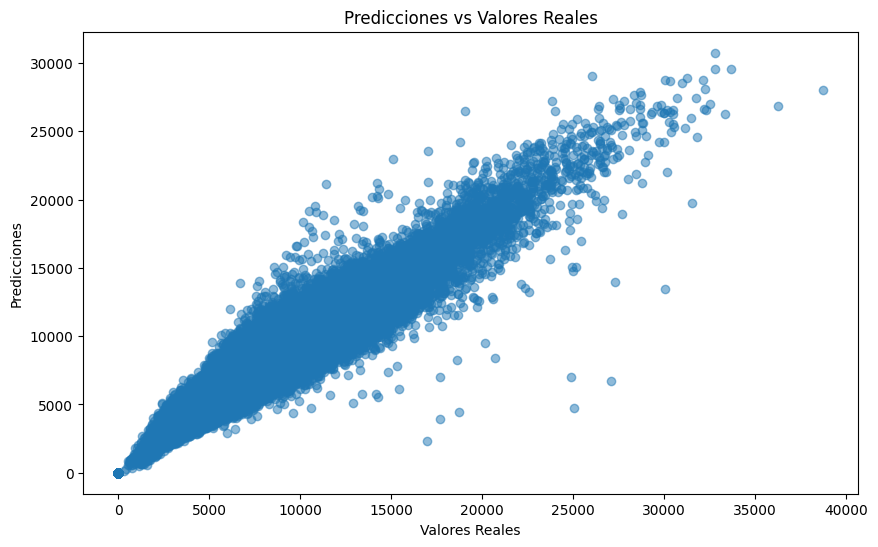

In [8]:
   import matplotlib.pyplot as plt

   # Obtener predicciones
   y_pred = modelo.predict(X_test)

   # Graficar predicciones vs valores reales
   plt.figure(figsize=(10, 6))
   plt.scatter(y_test, y_pred, alpha=0.5)
   plt.xlabel("Valores Reales")
   plt.ylabel("Predicciones")
   plt.title("Predicciones vs Valores Reales")
   plt.show()

### Gráficas de pérdidas en la historia de entrenamiento

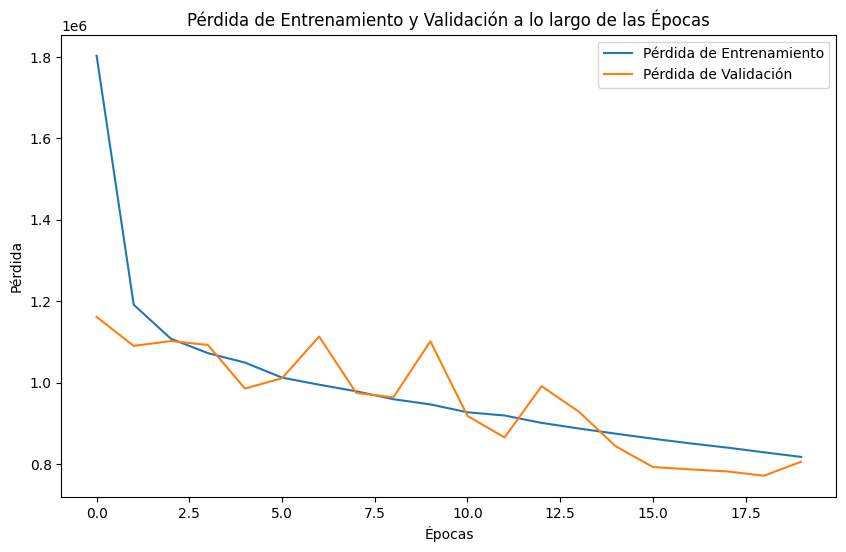

In [9]:
 

   # Obtener los datos de pérdida del historial
   perdida_entrenamiento = historial.history['loss']
   perdida_validacion = historial.history['val_loss']

   # Crear el gráfico
   plt.figure(figsize=(10, 6))
   plt.plot(perdida_entrenamiento, label='Pérdida de Entrenamiento')
   plt.plot(perdida_validacion, label='Pérdida de Validación')
   plt.xlabel('Épocas')
   plt.ylabel('Pérdida')
   plt.title('Pérdida de Entrenamiento y Validación a lo largo de las Épocas')
   plt.legend()
   plt.show()

### Predicción sobre los datos de evaluación (test)

In [10]:
   # Realizar predicciones
y_pred = modelo.predict(X_test)
 # Crear un DataFrame con las ventas reales y predichas
resultados = pd.DataFrame({
       'Ventas Reales': y_test.flatten(),  # Asegúrate de que y_test sea un array unidimensional
       'Ventas Predichas': y_pred.flatten()
   })

   # Mostrar las primeras 15 filas
print(resultados.head(15))

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
    Ventas Reales  Ventas Predichas
0            8336       8771.511719
1            2193       2504.665527
2            5375       4965.730957
3            3911       4176.705566
4            5604       6847.503418
5               0          0.944907
6           14836      14455.736328
7            8917       9111.708008
8               0          0.944907
9               0          0.944907
10           7438       6920.279297
11           8240       8319.210938
12           4625       5570.979980
13           4300       3967.204590
14           6857       8305.980469


In [11]:
 # Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)
 # Calcular el promedio del error absoluto
mae = mean_absolute_error(y_test, y_pred)
print("Promedio del Error Absoluto (MAE):", mae)

Error Cuadrático Medio (MSE): 815588.1875
Promedio del Error Absoluto (MAE): 603.0191040039062
